<a href="https://colab.research.google.com/github/DISC4FU/DISC4FU/blob/main/studentModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
import pandas as pd

print("Upload the synthetic_student_data.csv file .")
uploaded = files.upload()

filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

print("Loaded dataset:", filename)
df.head()


Upload the synthetic_student_data.csv file .


Saving synthetic_student_data.csv to synthetic_student_data.csv
Loaded dataset: synthetic_student_data.csv


,student_id,age,gender,highschool_gpa,attendance_rate,parent_income_level,previous_failures,study_hours_per_week,socioeconomic_status,enrolled
0,1,23,Female,2.44,52.8,Medium,3,15,High,1
1,2,36,Male,1.60,92.1,Medium,2,3,Middle,1
2,3,31,Female,3.05,52.6,Low,0,5,Middle,1
3,4,27,Female,2.34,50.9,Low,1,21,Low,0
4,5,24,Male,3.14,84.8,Medium,2,25,Low,1


In [3]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   student_id            300 non-null    int64  
 1   age                   300 non-null    int64  
 2   gender                300 non-null    object 
 3   highschool_gpa        300 non-null    float64
 4   attendance_rate       300 non-null    float64
 5   parent_income_level   300 non-null    object 
 6   previous_failures     300 non-null    int64  
 7   study_hours_per_week  300 non-null    int64  
 8   socioeconomic_status  300 non-null    object 
 9   enrolled              300 non-null    int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 23.6+ KB


,0
student_id,0
age,0
gender,0
highschool_gpa,0
attendance_rate,0
parent_income_level,0
previous_failures,0
study_hours_per_week,0
socioeconomic_status,0
enrolled,0


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Identify columns
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop("enrolled")

print("Categorical columns:", list(categorical_cols))
print("Numerical columns:", list(numerical_cols))

# Split data
X = df.drop("enrolled", axis=1)
y = df["enrolled"]

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)


Categorical columns: ['gender', 'parent_income_level', 'socioeconomic_status']
Numerical columns: ['student_id', 'age', 'highschool_gpa', 'attendance_rate', 'previous_failures', 'study_hours_per_week']


In [5]:
from sklearn.ensemble import RandomForestClassifier

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        n_estimators=300,
        random_state=42
    ))
])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training model…")
model.fit(X_train, y_train)
print("Training complete.")


Training model…
Training complete.


Accuracy: 0.5333333333333333
Precision: 0.5142857142857143
Recall: 0.5333333333333333
F1 Score: 0.5216666666666666


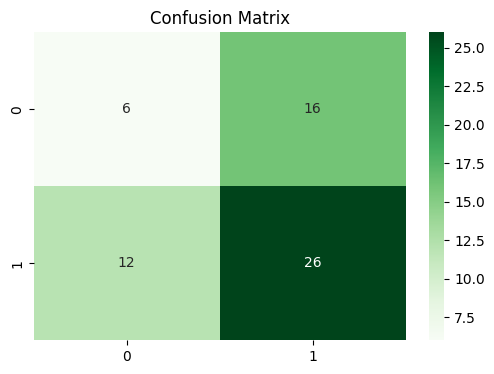

In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

# Confusion matrix visualization
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix")
plt.show()


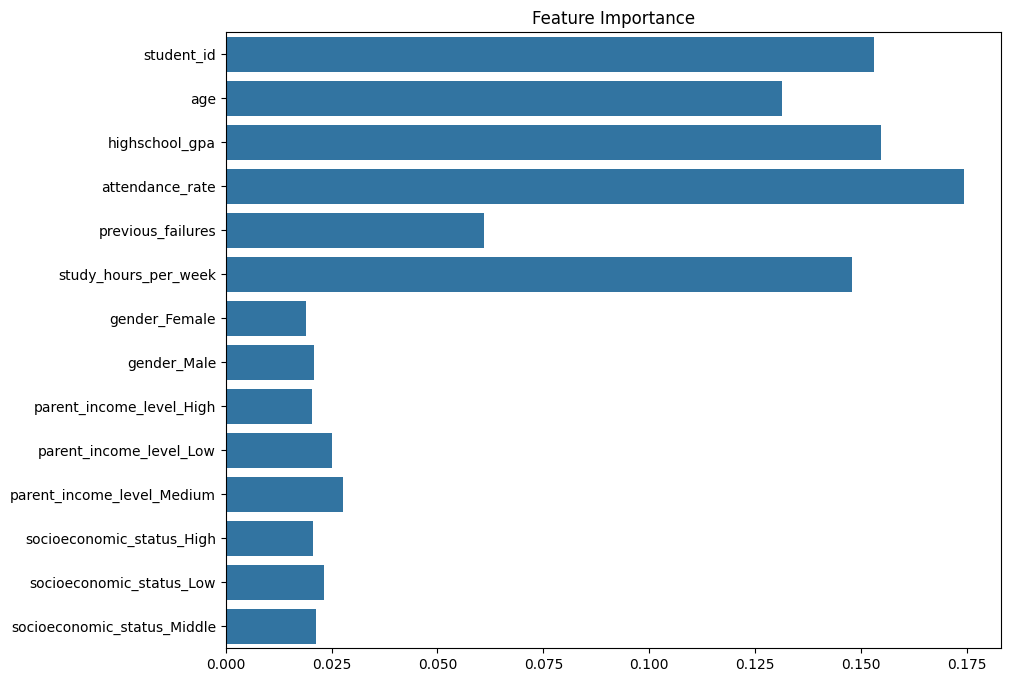

In [7]:
# Extract feature names after OneHotEncoder
ohe = model.named_steps['preprocessor'].named_transformers_['cat']
ohe_feature_names = ohe.get_feature_names_out(categorical_cols)

feature_names = list(numerical_cols) + list(ohe_feature_names)

# Get importance values
importances = model.named_steps['classifier'].feature_importances_

# Plot
plt.figure(figsize=(10,8))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance")
plt.show()


In [8]:
import joblib
from google.colab import files

joblib.dump(model, "student_enrollment_model.pkl")
files.download("student_enrollment_model.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>